Start Time: January 23, 2024
End Time: 

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn import linear_model
import matplotlib.pyplot as plt
import random

# 1. Two-dimention data

## 1.1 Create data and visualization

the intercept is -0.5986275849892874 and the coefficient is 0.53376686590539


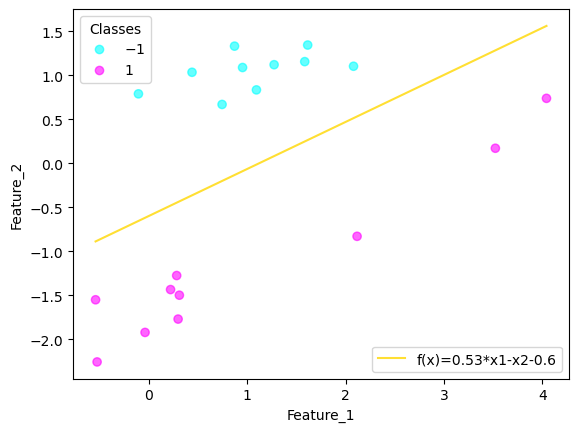

In [71]:
# two-dimention data
td_data = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=24)

td_data = list(td_data)
td_data[1] = np.array([-1 if i == 0 else 1 for i in td_data[1]])
td_data = tuple(td_data)

# visualized data
fig, ax = plt.subplots()
scatter = ax.scatter(td_data[0][:, 0], td_data[0][:, 1], c=td_data[1], alpha=0.6, cmap="cool")
legend_1 = ax.legend(*scatter.legend_elements(), title="Classes", loc="upper left")
ax.add_artist(legend_1)
ax.set_xlabel("Feature_1")
ax.set_ylabel("Feature_2")

# add minimal residual sum of squares line as gold standard
reg = linear_model.LinearRegression()

# reshape for model fitting
reg.fit(td_data[0][:, 0].reshape(-1, 1), td_data[0][:, 1].reshape(-1, 1))
print(f"the intercept is {reg.intercept_[0]} and the coefficient is {reg.coef_[0][0]}")
formula = f"f(x)={round(reg.coef_[0][0], 2)}*x1-x2{round(reg.intercept_[0], 2)}"

# create a x axis for plotting
create_x_axis = np.linspace(min(td_data[0][:, 0]), max(td_data[0][:, 0]), 100).reshape(-1, 1)
predicted_value = reg.predict(create_x_axis)

ax.plot(create_x_axis, predicted_value, c="gold", alpha=0.8, label=formula)
handles, labels = ax.get_legend_handles_labels()
legend_2 = ax.legend(handles, labels, loc="lower right")

plt.show()

## 1.2 manually fit data

The loss function 
$$
\min\mathbf{L}\mathcal{(\omega, b)} = -\sum_{x_{i}} \mathcal{y_{i}(\omega\cdot x_{i} + b)}
$$

In [61]:
# take the partial derivative of w and b
def partial_derivative_w(data_point):
    # feature_1 * feature_2
    result_w = data_point[0] * data_point[1]
    return result_w

def partial_derivative_b(data_point):
    # label
    result_b = data_point
    return result_b

# decision function. w and b will be change if exist data point make 
def decision_funtion(weight, intercept):
    # if y*(w*x+b) < 0, the data point is wrongly classified.
    result = td_data[1] * ((td_data[0][:, 0] + td_data[0][:, 1]) * weight + intercept)

    if len(result[np.where(result < 0)]) != 0:
        print(result)
        wrong_dp_index = np.where(result == result[np.where(result < 0)][0])[0][0]
        wrong_dp = td_data[0][wrong_dp_index]
        wrong_lb = td_data[1][wrong_dp_index]
        return [True, wrong_dp, wrong_lb]
    else:
        print("interation end")
        return [False, None, None]

def plot_function(weight, intercept):
    fig, ax = plt.subplots()
    scatter = ax.scatter(td_data[0][:, 0], td_data[0][:, 1], c=td_data[1], alpha=0.6)
    ax.legend(*scatter.legend_elements(), title="Classes")
    ax.set_xlabel("Feature_1")
    ax.set_ylabel("Feature_2")
    hyperplane = [weight * i + intercept for i in create_x_axis]
    ax.plot(create_x_axis, hyperplane, c='green', alpha=0.5)
    plt.show()


In [73]:
td_data[1] * ((td_data[0][:, 0] + td_data[0][:, 1]) * 0.43 - 0.6)

array([-1.44312433, -1.02704826, -0.04666494, -1.11130388, -0.76828559,
       -0.0325842 , -1.2334319 , -1.12231626, -0.27689283,  0.9880442 ,
       -0.34615145, -0.67144638, -0.42851953,  0.30702624, -1.79691109,
       -0.00696677, -0.22825654, -1.50006526, -0.57746366,  1.4552851 ])

In [62]:
# initiate weight, intercept and learning rate
weight = 0
intercept = 0
learn_rate = 0.3


# iteration times
iteration_times = 10

# random value in two dimention data
random_index = random.randint(0, 19)
feature_point = td_data[0][random_index]
label_point = td_data[1][random_index]
# it is not correctly classified for any data point resulting in loss function equte 0.

for iteration in range(iteration_times):
    # w1 = w0 + (learn_rate * y * x)
    new_weight = weight + (learn_rate * label_point * partial_derivative_w(feature_point))
    # b1 = b0 + learn_rate * y
    new_intercept = intercept + (learn_rate * partial_derivative_b(label_point))
    
    # decision
    decision_condition, wrong_dp, wrong_lp = decision_funtion(new_weight, new_intercept)
    
    if decision_condition:
        weight = new_weight
        intercept = new_intercept
        # wrong data point
        feature_point = wrong_dp
        label_point = wrong_lp
        print(f"The {iteration + 1} iteration\tweight={weight}\tintercept={intercept}\n")
        # plot_function(weight, intercept)
    else:
        break

    # print(f"The {iteration + 1} iteration\tweight={weight}\tintercept={intercept}\n")

# while decision_funtion(weight, intercept):
    

[-0.03373595 -0.16513543 -0.47474675 -0.13852697  0.73211333  0.49977413
 -0.09995816 -0.13504919  0.57692836 -0.8015145   0.59880067  0.70153089
  0.62481304  0.39252299  0.07799217  0.49168398  0.56156871 -0.01575364
  0.67185054 -0.94907216]
The 1 iteration	weight=0.13579674619552806	intercept=0.3

[ 0.22184145  0.11236422 -0.14559259  0.13453341  0.360021    0.16644449
  0.16666753  0.13743097  0.23072656 -0.41784351  0.24894977  0.33454083
  0.27062232  0.07708676  0.31492923  0.15970407  0.21792946  0.23682365
  0.30981225 -0.54078315]
The 2 iteration	weight=0.11314087505694918	intercept=0.0

[ 1.55523989  0.93578761 -0.52380287  1.06122702  1.73709772  0.64178865
  1.2430507   1.07762221  1.00551429 -2.0642734   1.10862622  1.59292393
  1.23125547  0.13617808  2.0819561   0.60364952  0.93310479  1.6400133
  1.45300286 -2.75989965]
The 3 iteration	weight=0.6401821580046257	intercept=-0.3

[ 2.88863833  1.75921101 -0.90201316  1.98792063  3.11417445  1.11713282
  2.31943386  2.017

In [4]:
weight = 0.53376686590539
intercept = -0.5986275849892874

td_data[0]

In [42]:
result = td_data[1] * ((td_data[0][:, 0] + td_data[0][:, 1]) * 0.14899688225093072) + 0.4
np.where(result == result[np.where(result < 0)][0])[0][0]

9

In [45]:
td_data[1][1]

-1

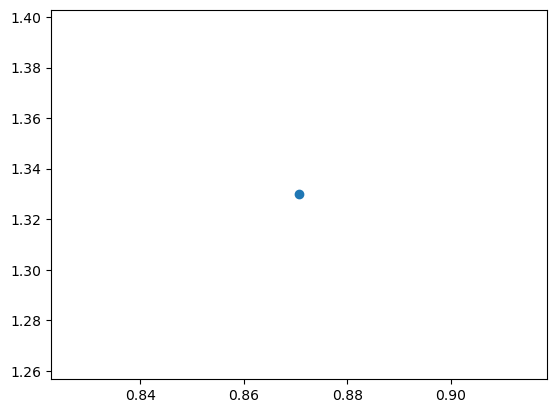

In [30]:
plt.scatter(td_data[0][10, 0], td_data[0][10, 1])

In [17]:
td_data[0][np.where(td_data[1] == -1)][:, 1]

array([-1.92145085, -1.27540828, -0.82994534, -1.49870802, -1.76993026,
       -1.43475338,  0.17011935, -2.25652144, -1.55073284,  0.73689887])

In [22]:
(td_data[0][np.where(td_data[1] == -1)][:, 0] + td_data[0][np.where(td_data[1] == -1)][:, 1]) * 0.53376686590539 - 0.5986275849892874

array([-1.64521324, -1.1287304 ,  0.08823735, -1.23331844, -1.38491819,
       -1.24698831,  1.37264073, -2.08437521, -1.71589506,  1.95263541])

In [25]:
0.14899688225093072 * (td_data[0][np.where(td_data[1] == -1)][:, 0] + td_data[0][np.where(td_data[1] == -1)][:, 1]) - 0.3

array([-0.59214627, -0.44797409, -0.10826698, -0.47716903, -0.51948693,
       -0.48098487,  0.25026427, -0.71473493, -0.61187655,  0.41216528])

In [ ]:
def decision_funtion(weight, intercept): # 判断的时候可以得用线性函数关于F1 和 F2的
    # store raw index of all positive and negative sample for finding wrongly classified data point
    raw_positive_index = [np.where(td_data[1] == 1)][0][0]
    raw_negative_index = [np.where(td_data[1] == -1)][0][0]

    positive_result = (td_data[0][np.where(td_data[1] == 1)][:, 0] + td_data[0][np.where(td_data[1] == 1)][:, 1]) * weight + intercept
    negative_result = -1 * ((td_data[0][np.where(td_data[1] == -1)][:, 0] + td_data[0][np.where(td_data[1] == -1)][:, 1]) * weight + intercept)

    if len(positive_result[positive_result < 0]) == 0 and len(negative_result[negative_result < 0]) == 0:
        print(f"iteration end. the weight is {weight} and the intercept is {intercept}")
        return [False, None, None]
    else:
        if len(positive_result[positive_result < 0]) == 0:
            wrong_dp = td_data[0][raw_negative_index[np.where(negative_result < 0)[0][0]]]
            return [True, wrong_dp, -1]
        elif len(negative_result[negative_result < 0]) == 0 :
            wrong_dp = td_data[0][raw_positive_index[np.where(positive_result < 0)[0][0]]]
            return [True, wrong_dp, 1]
        else:
            wrong_dp = td_data[0][raw_positive_index[np.where(positive_result < 0)[0][0]]]
            return [True, wrong_dp, 1]